In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram
from geopy.geocoders import Nominatim
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Function to get coordinates for a city
def get_coordinates(city):
    geolocator = Nominatim(user_agent="city_coordinates")
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# List of cities
cities = ['Tokyo', 'New York', 'London', 'Paris', 'Berlin', 'Sydney', 'Beijing', 'Cairo', 'Lagos', 'Mexico City',
          'Moscow', 'Rio de Janeiro', 'Delhi', 'Bangkok', 'Cape Town', 'Toronto', 'Buenos Aires', 'Riyadh', 'Nairobi', 'Seoul',
          'Bogota', 'Jakarta', 'Karachi', 'Mumbai', 'Los Angeles', 'Oslo', 'Nairobi', 'Johannesburg', 'Lima', 'Hanoi',
          'Rome', 'Madrid', 'Athens', 'Stockholm', 'Dubai', 'Singapore', 'Helsinki', 'Wellington', 'Brasilia', 'Ottawa']

# Get coordinates for each city
coordinates = [get_coordinates(city) for city in cities]

# Create DataFrame
df = pd.DataFrame(coordinates, columns=['Latitude', 'Longitude'], index=cities)

df

,Latitude,Longitude
Tokyo,35.682194,139.762221
New York,40.712728,-74.006015
London,51.507446,-0.127765
Paris,48.853495,2.348391
Berlin,52.517037,13.388860
Sydney,-33.869844,151.208285
Beijing,39.905714,116.391297
Cairo,30.044388,31.235726
Lagos,6.455057,3.394179
Mexico City,19.432630,-99.133178


In [4]:
X = df.to_numpy()

Elbow method

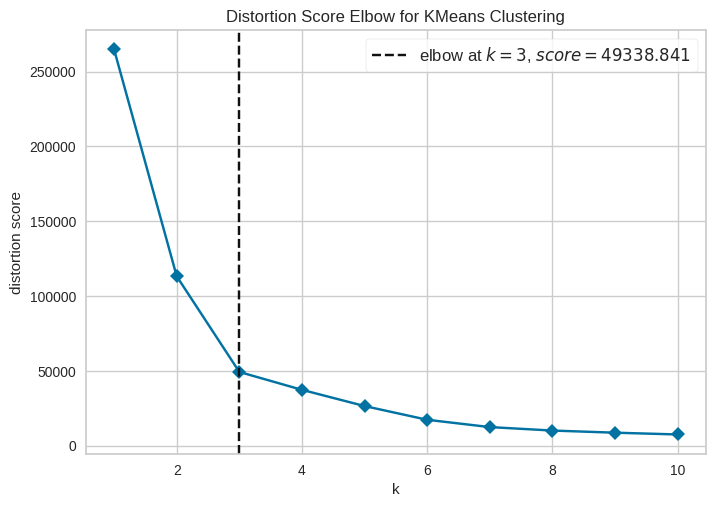

In [5]:
# Instantiate the KMeans model
model = KMeans()

# Use the KElbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(model, k=(1, 11), metric='distortion', timings=False)

# Fit the data to the visualizer
visualizer.fit(X)

# Visualize the elbow plot
visualizer.show()

plt.show()

In [6]:
best_k = 3

kmeans = KMeans(n_clusters=best_k)
kmeans.fit(X)

labels = kmeans.labels_

centers = kmeans.cluster_centers_

In [7]:
pd.DataFrame(centers.T)

,0,1,2
0,10.849347,12.906905,29.059351
1,116.441599,-75.976683,21.913078


In [8]:
distances = cdist(X, centers)

distances_df = pd.DataFrame(distances, columns=["Distance Center {}".format(i+1) for i in range(best_k)])

distances_df.index = df.index

distances_df

,Distance Center 1,Distance Center 2,Distance Center 3
Tokyo,34.066430,216.937752,118.035090
New York,192.774779,27.875568,96.624395
London,123.456461,85.106169,31.459748
Paris,120.256290,86.179896,27.831369
Berlin,111.157831,97.750512,24.958472
Sydney,56.643874,231.950585,143.796154
Beijing,29.056410,194.253379,95.098777
Cairo,87.341230,108.573449,9.374543
Lagos,113.132793,79.632657,29.221631
Mexico City,215.745585,24.058437,121.428457


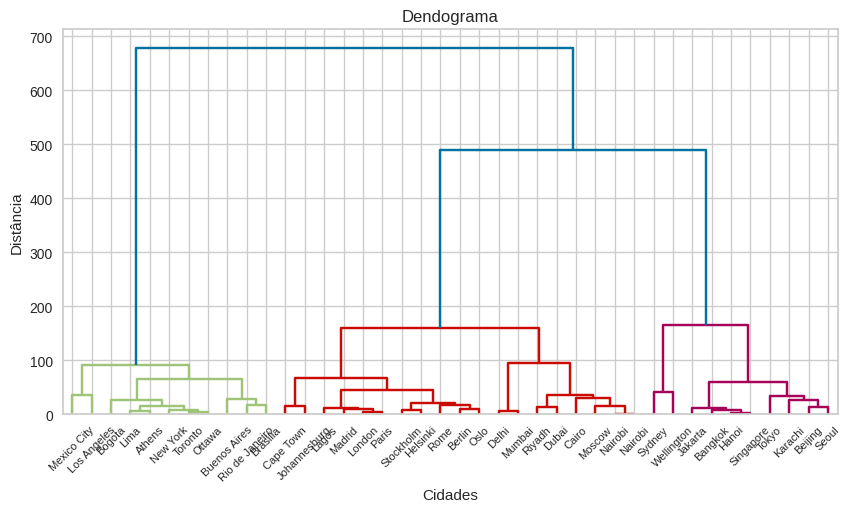

In [9]:
Z = linkage(distances_df, method="ward")

num_clusters = best_k

color_threshold = Z[-(num_clusters-1), 2]

plt.figure(figsize=(10,5))
dendrogram(Z, labels=df.index, color_threshold=color_threshold)
plt.title("Dendograma")
plt.xlabel("Cidades")
plt.ylabel("Distância")
plt.show()